<a href="https://colab.research.google.com/github/kkrusere/EV_Market-Analysis-and-Consumer-Behavior/blob/main/data_collection_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mounting spu google drive
from google.colab import drive
drive.mount('/content/drive')

########################################

#changing the working directory
import os
os.chdir("/content/drive/MyDrive/SPU DS Graduate RA - EV Project/EV Market Analysis and Consumer Behavior")

!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/SPU DS Graduate RA - EV Project/EV Market Analysis and Consumer Behavior


### EV - Market Analysis and Consumer Behavior

This notebook is for exploring  various datasets conducting preliminary exploratory data analysis (EDA) with the objective of understanding if they are suitable for analyzing the Electric Vehicle (EV) market and discerning consumer behavior trends.


> - Data Collection and Integration: Acquisition and integration of different datasets relevant to the EV market and consumer behavior. (datasets may include information on EV sales, charging infrastructure, government incentives, demographic data, consumer surveys, and possibly other related metrics)
> - Data Cleaning and Preparation: Cleaning and preprocessing the collected datasets to ensure data quality and consistency.
> - Preliminary EDA: Conducting the EDA to gain insights into the characteristics and patterns within the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset1: The role of gender in consumer markets for electric vehicles - https://datadryad.org/stash/dataset/doi:10.25338/B80P8D

Data Description:

- Data sourced from households who purchased at least one new household vehicle since January 2008
- Questionnaire administered online
- Survey conducted in specific US states: California, Connecticut, Delaware,Maine, Maryland, Massachusetts, New Hampshire, New Jersey, New York, Oregon, Rhode Island, Vermont, and Washington
- Most states are "ZEV states" following California's Zero Emission Vehicle (ZEV) Mandate
- Non-ZEV states included for regional analysis or significance to the initial launch of retail ZEV sales in 2011
- Primary regional analysis focused on Northeast States for Coordinated Air Use Management (NESCAUM)
- NESCAUM member states: Connecticut, Maine, Maryland, Massachusetts, New Hampshire, New Jersey, New York, Rhode Island, and Vermont
- Total sample size: 5,654 across all states

In [3]:
#lets read the datasets into pandas dataframes:
CA_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863279")
DE_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863280")
MA_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863281")
MD_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863284")
NESCAUM_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863290")
NJ_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863285")
NY_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863288")
OR_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863289")
WA_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863293")



In [4]:
#deeper look into the CA_dataset:
CA_dataset.head()

,Response ID..,"No Trucks, Plus Incentives: drivetrain design 1","No Trucks, Plus Incentives: drivetrain design 2","No Trucks, Plus Incentives: drivetrain design 3","No Trucks, Plus Incentives: drivetrain design 4","No trucks, plus incentives: drivetrain design",Respondent Education,rRespondent Education,Respondent Gender,Respondent Sex,...,w Non-ZEV: maintenance cost,w Non-ZEV: fuel cost,w Non-ZEV: lifestyle,w Non-ZEV: charge/fuel time,w Non-ZEV: range,w Non-ZEV: fuel safety,w Non-ZEV: environmental concerns,w Non-ZEV: battery concerns,w Non-ZEV: reliability,w Non-ZEV: higher incentives
0,40,HEV,NaN,NaN,NaN,HEV,"Masters, Doctorate, or Professional Degree","Masters, Doctorate, or Professional Degree",Female,Female,...,0.0,0.0,0.0,5.490969,5.490969,0.0,0.0,0.0,0.0,NaN
1,36,HEV,NaN,NaN,NaN,HEV,College Graduate,College Graduate,Male,Male,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,NaN
2,32,PHEV,NaN,NaN,NaN,PHEV,"Masters, Doctorate, or Professional Degree","Masters, Doctorate, or Professional Degree",Male,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,48,EV,NaN,NaN,NaN,EV,High School Graduate or GED,High school or less,Male,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,50,EV,NaN,NaN,NaN,EV,Some Graduate School,Some Graduate School,Female,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [5]:
CA_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Columns: 197 entries, Response ID.. to w Non-ZEV: higher incentives
dtypes: float64(156), int64(1), object(40)
memory usage: 2.5+ MB


In [9]:
CA_dataset.describe()

,Veh 1 Total Price,"Veh 1 Total Price, don't know","Fuel economy, gasoline / diesel / ethanol","Fuel economy, gasoline / diesel / ethanol truncated","Fuel economy, gasoline / diesel / ethanol, no idea",Distance,Respondent's vehicle's monthly miles,Respondent's vehicle's monthly miles truncated,Fuel spending,Respondent's car fuel spending per month,...,w Non-ZEV: maintenance cost,w Non-ZEV: fuel cost,w Non-ZEV: lifestyle,w Non-ZEV: charge/fuel time,w Non-ZEV: range,w Non-ZEV: fuel safety,w Non-ZEV: environmental concerns,w Non-ZEV: battery concerns,w Non-ZEV: reliability,w Non-ZEV: higher incentives
count,1364.000000,1670.000000,1222.000000,1179.000000,1586.000000,1554.000000,1554.000000,1536.000000,1556.000000,1556.000000,...,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,717.000000
mean,29176.980931,0.150299,122.067791,26.616743,0.226986,568.017053,1037.479408,845.022786,125.989839,256.237635,...,1.306024,1.053910,0.630626,1.469865,1.910055,0.393353,0.372058,1.057587,1.020342,0.964290
std,11945.354679,0.357472,1367.254235,8.645870,0.419016,1384.582176,2249.244646,1069.474721,376.307147,913.518974,...,1.963885,1.774729,1.457109,2.027664,2.229511,1.096498,1.101925,1.777936,1.775117,1.643760
min,10000.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21000.000000,0.000000,21.000000,21.000000,0.000000,100.000000,291.000000,280.000000,40.000000,80.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27000.000000,0.000000,25.050000,25.000000,0.000000,200.000000,600.000000,600.000000,65.000000,120.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35000.000000,0.000000,31.000000,30.000000,0.000000,600.000000,1000.000000,1000.000000,120.000000,200.000000,...,2.196388,1.098194,0.000000,3.000000,4.392775,0.000000,0.000000,1.098194,1.098194,1.098194
max,125500.000000,1.000000,30400.000000,100.000000,1.000000,25000.000000,40000.000000,10000.000000,10000.000000,22200.000000,...,5.490969,5.490969,5.490969,5.490969,5.490969,5.490969,5.490969,5.490969,5.490969,5.490969


from matplotlib import pyplot as plt
_df_0['Veh 1 Total Price'].plot(kind='hist', bins=20, title='Veh 1 Total Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1["Veh 1 Total Price, don't know"].plot(kind='hist', bins=20, title="Veh 1 Total Price, don't know")
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Fuel economy, gasoline / diesel / ethanol'].plot(kind='hist', bins=20, title='Fuel economy, gasoline / diesel / ethanol')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Fuel economy, gasoline / diesel / ethanol truncated'].plot(kind='hist', bins=20, title='Fuel economy, gasoline / diesel / ethanol truncated')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Veh 1 Total Price', y="Veh 1 Total Price, don't know", s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x="Veh 1 Total Price, don't know", y='Fuel economy, gasoline / diesel / ethanol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Fuel economy, gasoline / diesel / ethanol', y='Fuel economy, gasoline / diesel / ethanol truncated', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Fuel economy, gasoline / diesel / ethanol truncated', y='Fuel economy, gasoline / diesel / ethanol, no idea', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['EV: charge time']
  ys = series['Veh 1 Total Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('EV: charge time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('EV: charge time')
_ = plt.ylabel('Veh 1 Total Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['EV: charge time']
  ys = series["Veh 1 Total Price, don't know"]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('EV: charge time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('EV: charge time')
_ = plt.ylabel("Veh 1 Total Price, don't know")

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['EV: charge time']
  ys = series['Fuel economy, gasoline / diesel / ethanol']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('EV: charge time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('EV: charge time')
_ = plt.ylabel('Fuel economy, gasoline / diesel / ethanol')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['EV: charge time']
  ys = series['Fuel economy, gasoline / diesel / ethanol truncated']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('EV: charge time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('EV: charge time')
_ = plt.ylabel('Fuel economy, gasoline / diesel / ethanol truncated')

from matplotlib import pyplot as plt
_df_12['Veh 1 Total Price'].plot(kind='line', figsize=(8, 4), title='Veh 1 Total Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13["Veh 1 Total Price, don't know"].plot(kind='line', figsize=(8, 4), title="Veh 1 Total Price, don't know")
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Fuel economy, gasoline / diesel / ethanol'].plot(kind='line', figsize=(8, 4), title='Fuel economy, gasoline / diesel / ethanol')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Fuel economy, gasoline / diesel / ethanol truncated'].plot(kind='line', figsize=(8, 4), title='Fuel economy, gasoline / diesel / ethanol truncated')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
CA_dataset["Response ID.."].dtype

dtype('int64')

In [7]:
CA_dataset["Response ID.."] = CA_dataset["Response ID.."].astype(str)

In [8]:
#lets loook at all the columns' names and their datatypes:
for column_name in list(CA_dataset.columns):
  datatype = CA_dataset[f"{column_name}"].dtype
  print(f"{column_name}  --> {datatype}")

Response ID..  --> object
No Trucks, Plus Incentives: drivetrain design 1  --> object
No Trucks, Plus Incentives: drivetrain design 2  --> object
No Trucks, Plus Incentives: drivetrain design 3  --> object
No Trucks, Plus Incentives: drivetrain design 4  --> object
No trucks, plus incentives: drivetrain design  --> object
Respondent Education  --> object
rRespondent Education  --> object
Respondent Gender  --> object
Respondent Sex  --> object
Gender 2  --> object
Income 2  --> object
rIncome  --> object
Veh 1 Total Price  --> float64
Veh 1 Total Price, don't know  --> float64
Fuel economy, gasoline / diesel / ethanol  --> float64
Fuel economy, gasoline / diesel / ethanol truncated  --> float64
Fuel economy, gasoline / diesel / ethanol, no idea  --> float64
Distance  --> float64
Distance Week/Month  --> object
Respondent's vehicle's monthly miles  --> float64
Respondent's vehicle's monthly miles truncated  --> float64
Fuel spending  --> float64
Fuel spending Week/month  --> object
Resp

We are going to some preliminary EDA on this dataset (the CA_dataset for starters) just to see what's in it and evaluate it's usability in the project


<ipython-input-22-b848c0ff8474>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=CA_dataset, x=var, palette='viridis')


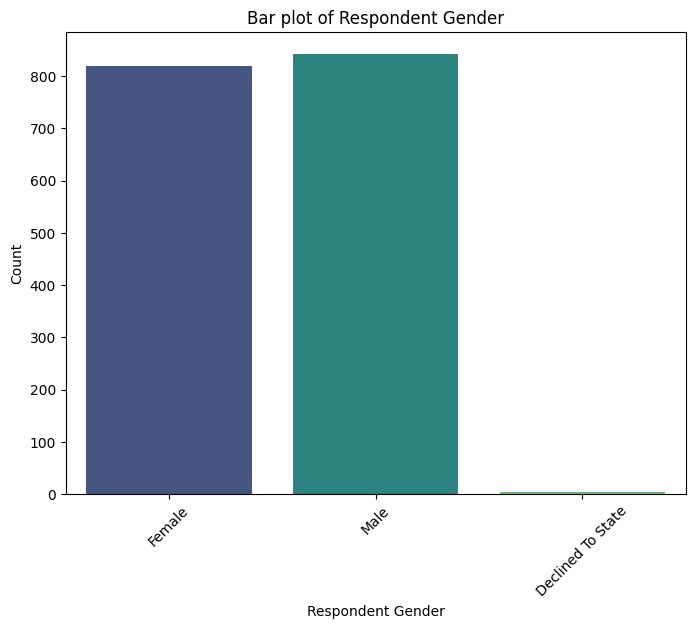

<ipython-input-22-b848c0ff8474>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=CA_dataset, x=var, palette='viridis')


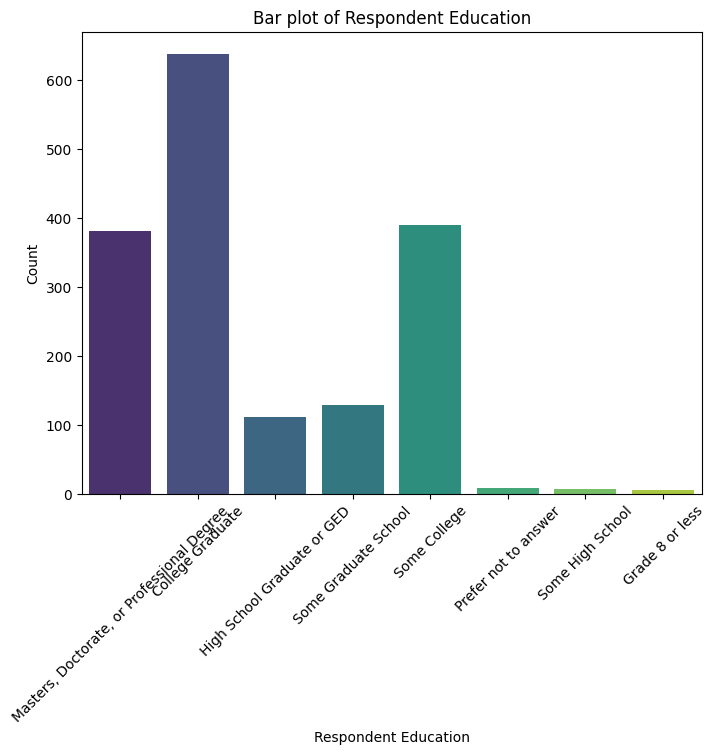

<ipython-input-22-b848c0ff8474>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=CA_dataset, x=var, palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


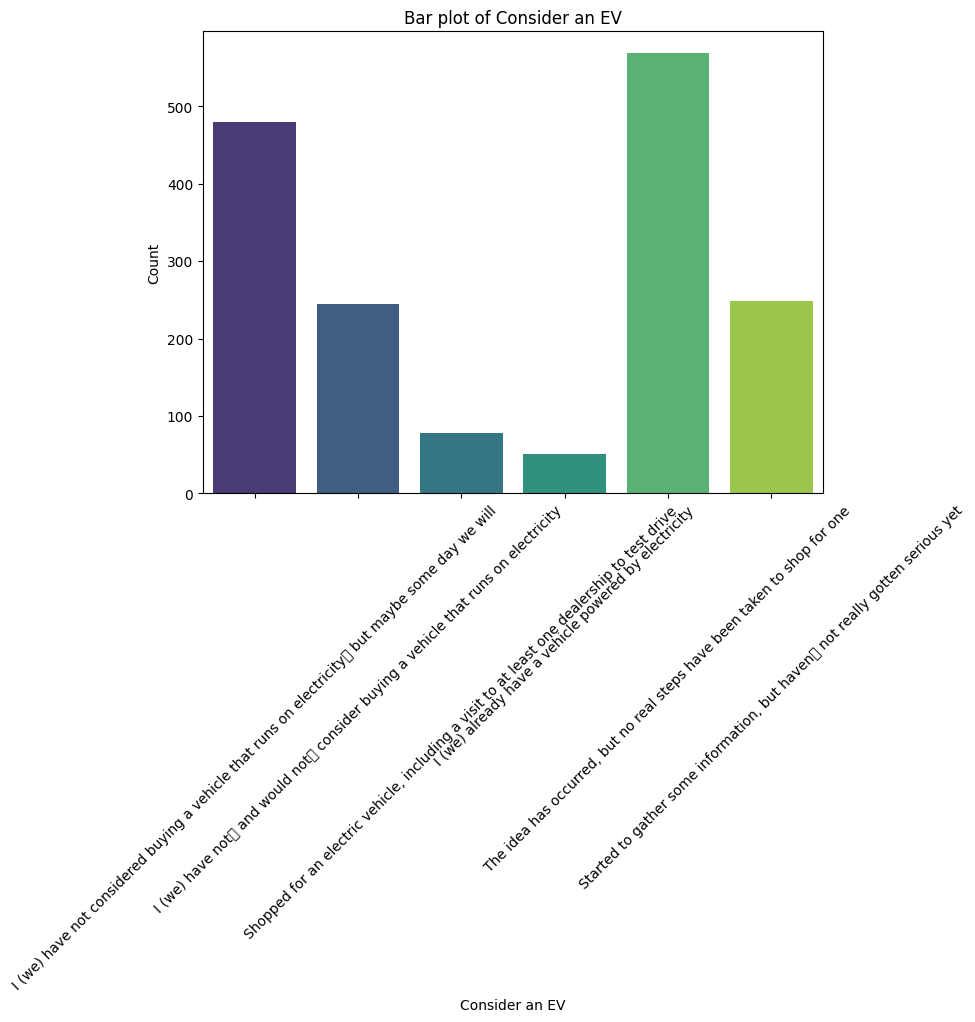

In [22]:
# Bar plots for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=CA_dataset, x=var, palette='viridis')
    plt.title(f'Bar plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


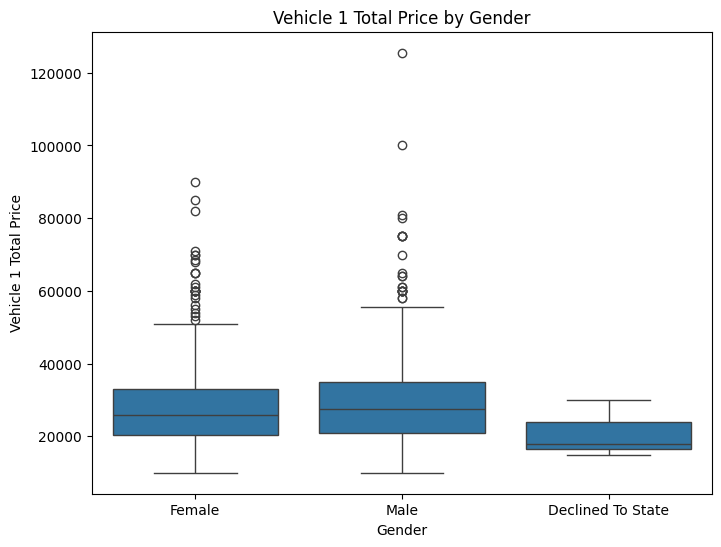

In [27]:
# Box plot for 'Veh 1 Total Price' by 'Respondent Gender'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Respondent Gender', y='Veh 1 Total Price', data=CA_dataset)
plt.xlabel('Gender')
plt.ylabel('Vehicle 1 Total Price')
plt.title('Vehicle 1 Total Price by Gender')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


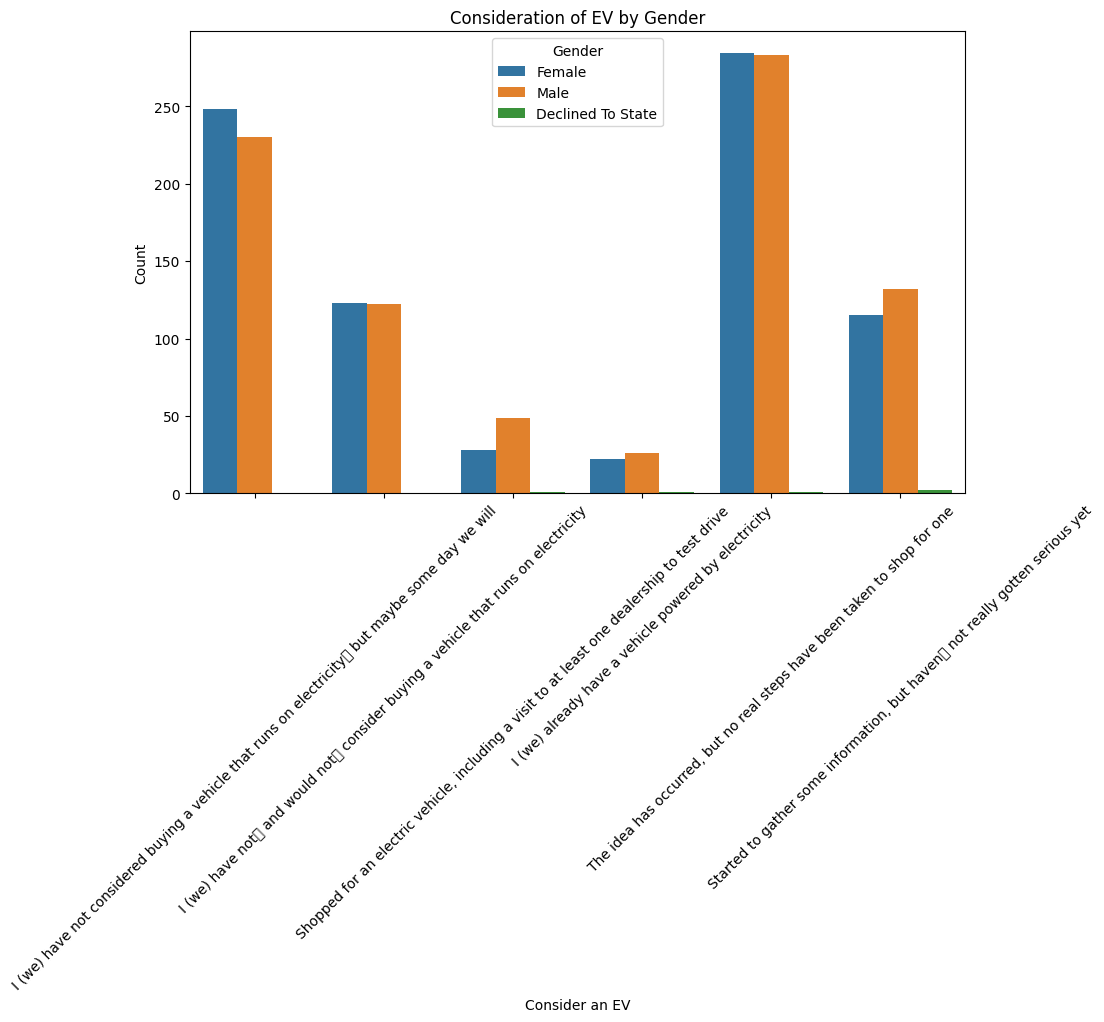

In [30]:
# Stacked bar plot for 'Respondent Gender' by 'Consider an EV'
plt.figure(figsize=(10, 6))
sns.countplot(x='Consider an EV', hue='Respondent Gender', data=CA_dataset)
plt.xlabel('Consider an EV')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Consideration of EV by Gender')
plt.legend(title='Gender')
plt.show()

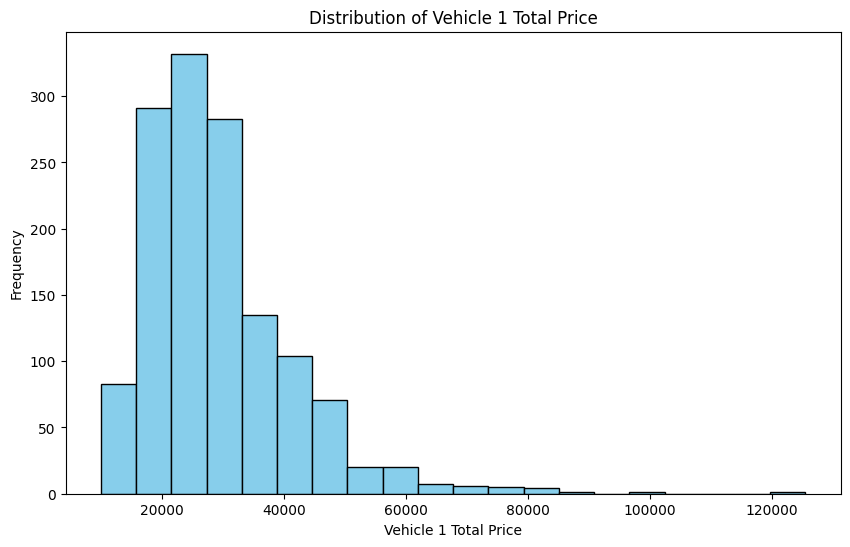

In [25]:
# Histogram for 'Veh 1 Total Price'
plt.figure(figsize=(10, 6))
plt.hist(CA_dataset['Veh 1 Total Price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Vehicle 1 Total Price')
plt.ylabel('Frequency')
plt.title('Distribution of Vehicle 1 Total Price')
plt.show()

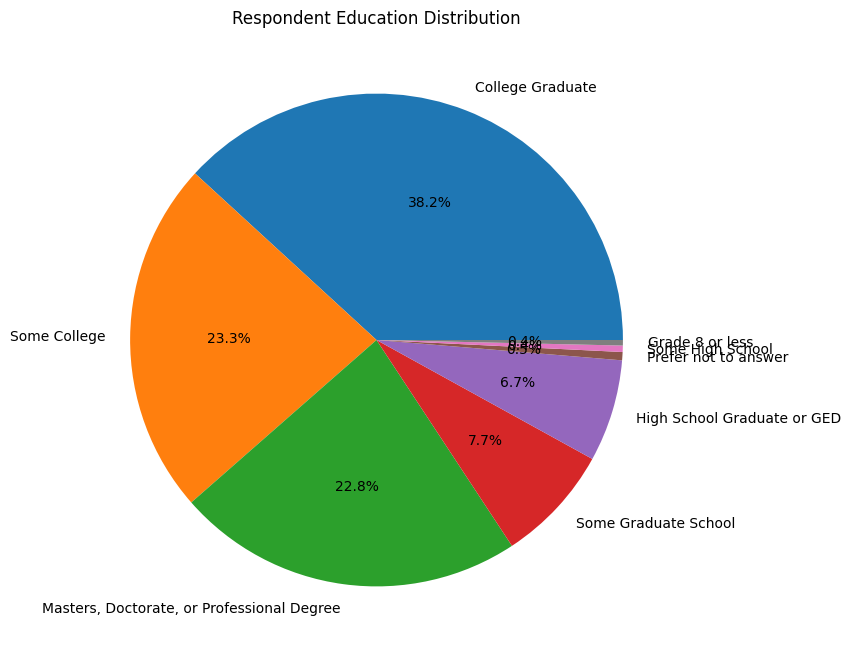

In [28]:
# Pie chart for 'Respondent Education'
plt.figure(figsize=(8, 8))
CA_dataset['Respondent Education'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Respondent Education Distribution')
plt.ylabel('')
plt.show()

In [31]:
CA_dataset["Income 2"]

0        $100,000 to 149,999
1          $75,000 to 99,999
2        $100,000 to 149,999
3          $50,000 to 74,999
4          $25,000 to 34,999
                ...         
1666     $100,000 to 149,999
1667    $150,000 to $199,999
1668       $75,000 to 99,999
1669       $75,000 to 99,999
1670       $50,000 to 74,999
Name: Income 2, Length: 1671, dtype: object

In [33]:
CA_dataset["Income 2"].value_counts()

$100,000 to 149,999     370
$75,000 to 99,999       361
$50,000 to 74,999       348
$35,000 to 49,999       152
$150,000 to $199,999    138
$25,000 to 34,999       105
$250,000 or more         61
$200,000 to $249,999     58
$15,000 to 24,999        37
Under $10,000            26
$10,000 to 14,999        15
Name: Income 2, dtype: int64

In [37]:
# Grouping the data by "Income 2"
grouped_data = CA_dataset.groupby('Income 2')

#Mean of 'Veh 1 Total Price' within each income group
mean_price_by_income = grouped_data['Veh 1 Total Price'].mean()
print(mean_price_by_income)



Income 2
$10,000 to 14,999       21854.090909
$100,000 to 149,999     31713.851852
$15,000 to 24,999       22659.161290
$150,000 to $199,999    32156.313043
$200,000 to $249,999    33768.367347
$25,000 to 34,999       25362.333333
$250,000 or more        39141.000000
$35,000 to 49,999       24787.247778
$50,000 to 74,999       26793.346429
$75,000 to 99,999       29156.240803
Under $10,000           22216.076923
Name: Veh 1 Total Price, dtype: float64


<ipython-input-38-375df06ce277>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Income 2', y='Veh 1 Total Price', data=CA_dataset, palette='husl')


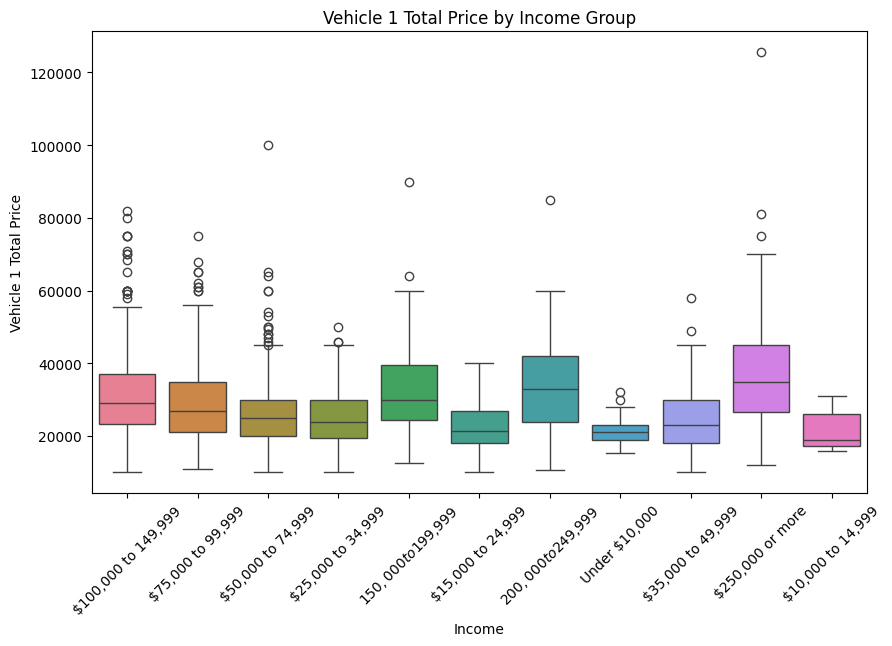

In [38]:
# Box plot of 'Veh 1 Total Price' by 'Income 2'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income 2', y='Veh 1 Total Price', data=CA_dataset, palette='husl')
plt.xlabel('Income')
plt.ylabel('Vehicle 1 Total Price')
plt.title('Vehicle 1 Total Price by Income Group')
plt.xticks(rotation=45)
plt.show()

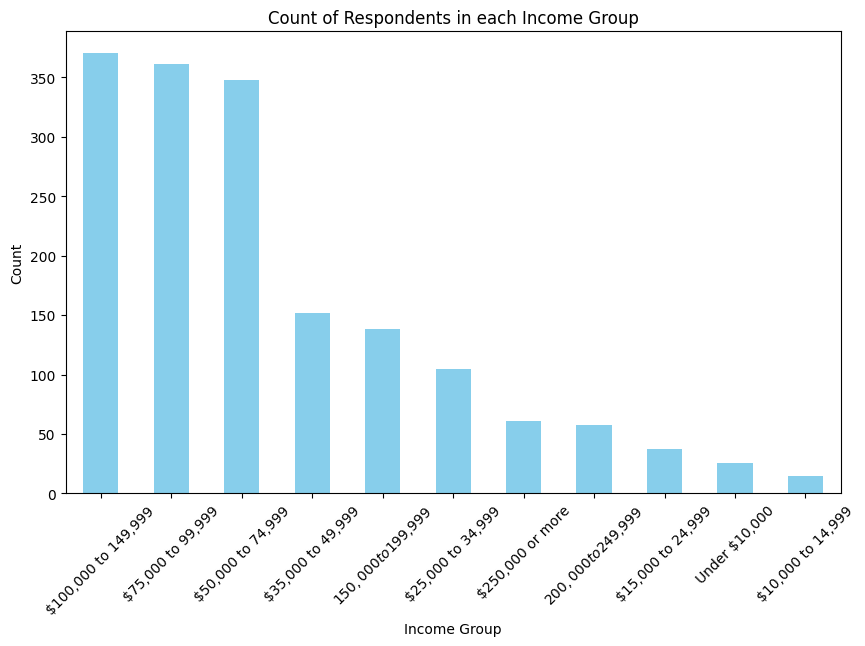

In [39]:
plt.figure(figsize=(10, 6))
CA_dataset['Income 2'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.title('Count of Respondents in each Income Group')
plt.xticks(rotation=45)
plt.show()

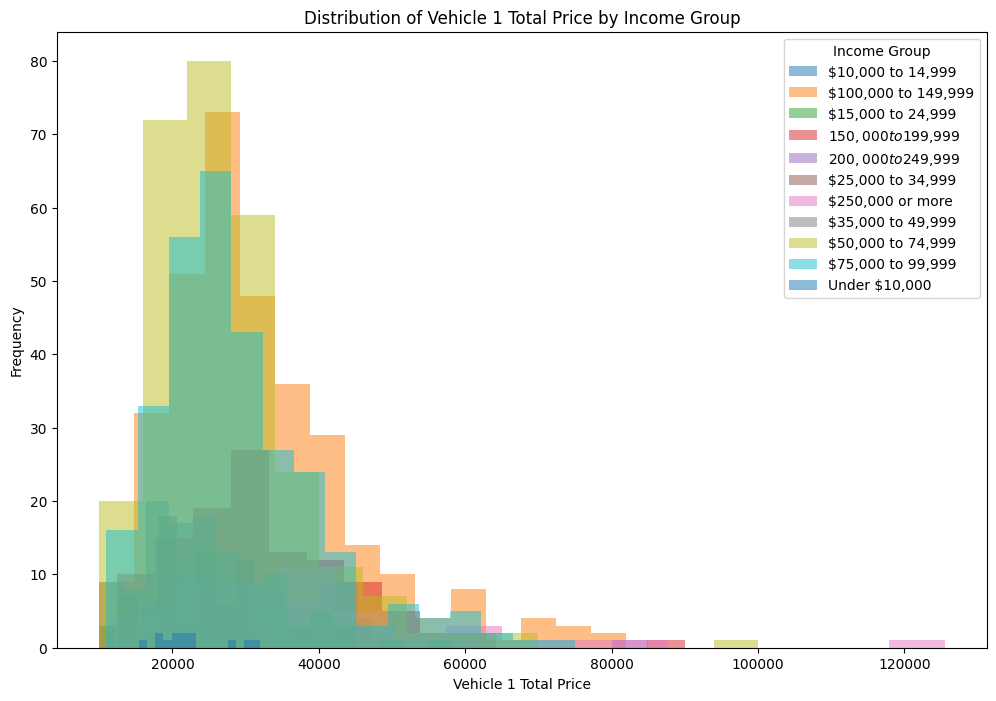

In [40]:
plt.figure(figsize=(12, 8))
for income_group, group_data in grouped_data:
    plt.hist(group_data['Veh 1 Total Price'], alpha=0.5, label=str(income_group), bins=15)

plt.xlabel('Vehicle 1 Total Price')
plt.ylabel('Frequency')
plt.title('Distribution of Vehicle 1 Total Price by Income Group')
plt.legend(title='Income Group')
plt.show()

<ipython-input-41-0b034d76cad4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Income 2', y='Fuel spending', data=CA_dataset, palette='husl')


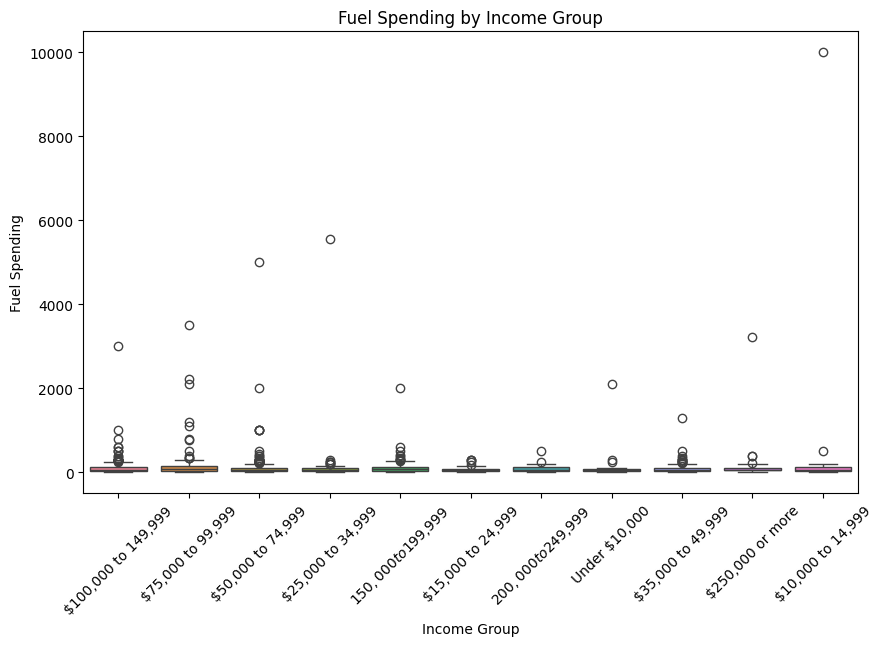

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income 2', y='Fuel spending', data=CA_dataset, palette='husl')
plt.xlabel('Income Group')
plt.ylabel('Fuel Spending')
plt.title('Fuel Spending by Income Group')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


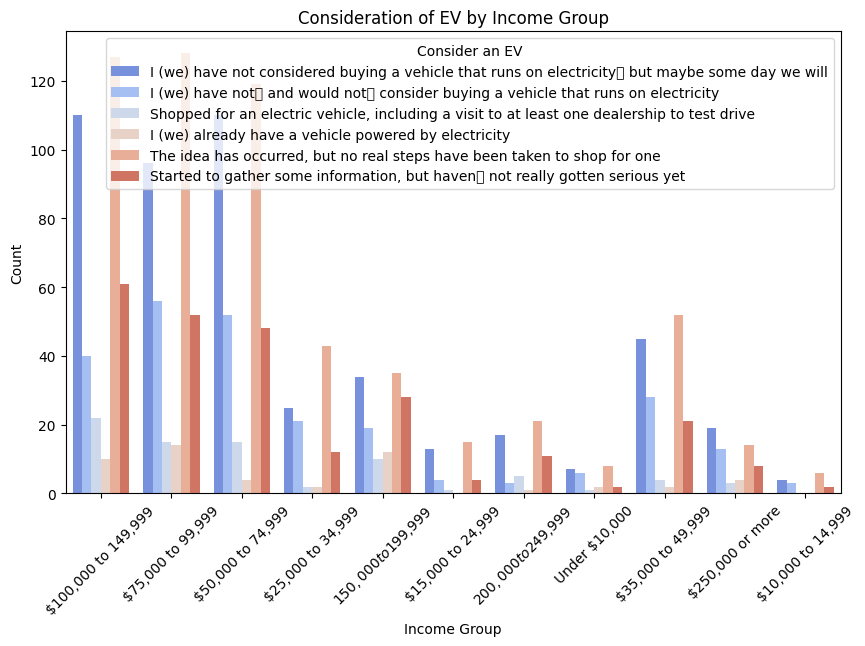

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Income 2', hue='Consider an EV', data=CA_dataset, palette='coolwarm')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.title('Consideration of EV by Income Group')
plt.xticks(rotation=45)
plt.legend(title='Consider an EV')
plt.show()

In [45]:
NESCAUM_dataset.head()

,Response ID..,"No Trucks, Plus Incentives: drivetrain design 1","No Trucks, Plus Incentives: drivetrain design 2","No Trucks, Plus Incentives: drivetrain design 3","No Trucks, Plus Incentives: drivetrain design 4","No trucks, plus incentives: drivetrain design",Respondent Education,rRespondent Education,Respondent Gender,Respondent Sex,...,w Non-ZEV: maintenance cost,w Non-ZEV: fuel cost,w Non-ZEV: lifestyle,w Non-ZEV: charge/fuel time,w Non-ZEV: range,w Non-ZEV: fuel safety,w Non-ZEV: environmental concerns,w Non-ZEV: battery concerns,w Non-ZEV: reliability,w Non-ZEV: higher incentives
0,37,NaN,NaN,NaN,PHEV,PHEV,"Masters, Doctorate, or Professional Degree","Masters, Doctorate, or Professional Degree",Female,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.395423
1,35,HEV,NaN,NaN,NaN,HEV,Some High School,"High School Grad, GED, or less",Male,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2,654,Gas,NaN,NaN,NaN,Gas,"Masters, Doctorate, or Professional Degree","Masters, Doctorate, or Professional Degree",Male,Male,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,NaN
3,28,PHEV,NaN,NaN,NaN,PHEV,College Graduate,College Graduate,Male,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,27,NaN,NaN,HEV,NaN,HEV,College Graduate,College Graduate,Female,Female,...,4.395423,5.494278,3.296567,3.296567,2.197711,0.0,3.296567,2.197711,0.0,NaN
